Description about Notebook Work


Import Modules for Data Analysis

In [1]:
### Importing Necessary libraries of python such as pandas, numpy, matplotlib, datetime etc.

import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from colorama import Fore, Style
from dateutil import parser

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

Exploring Uber Dataset

In [2]:
## Reading the data 
data = pd.read_csv(r"C:\Sudhanshu_Sharma\Learning\Dataset\Jupyter\Practice\Datasets\UberDataset.csv")
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
## Dimensions of Dataset
data.shape

(1156, 7)

In [4]:
## Overview of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
### Finding data type, Number of Unique Values, Number of Null vales, Percetage of Null values, Mean and Median of Miles column

def checking_func(data):
    check_data = []
    columns = data.columns
    for col in columns:
        #DATA TYPE
        data_types = data[col].dtypes
        #NUMBER OF UNIQUE VALUES
        num_unique_values = data[col].nunique()
        # NUMBER OF NULL VALUES
        sum_null_values = data[col].isnull().sum()
        #NULL VALUE PERCENTAGE
        null_percentage = (sum_null_values * 100 / len(data))
        #MEAN
        if col == 'MILES':
                mean = data[col].mean()
        else:
                mean = 'N/A'
        #MEDIAN
        if col == 'MILES':
                median = data[col].median()
        else:
                median = 'N/A'
        ## Appending the values of above functions
        check_data.append([col,data_types,num_unique_values,sum_null_values,null_percentage,mean,median])
    
    ## Converting to DataFrame
    data_check = pd.DataFrame(check_data)
    data_check.columns = ['columns','data_types','num_unique_values','sum_null_values','null_percentage','mean','median']
    return data_check


checking_func(data)

,columns,data_types,num_unique_values,sum_null_values,null_percentage,mean,median
0,START_DATE,object,1155,0,0.000000,N/A,N/A
1,END_DATE,object,1154,1,0.086505,N/A,N/A
2,CATEGORY,object,2,1,0.086505,N/A,N/A
3,START,object,177,1,0.086505,N/A,N/A
4,STOP,object,188,1,0.086505,N/A,N/A
5,MILES,float64,257,0,0.000000,21.115398,6.0
6,PURPOSE,object,10,503,43.512111,N/A,N/A


Data Cleaning of Dataset


In [6]:
### Null Values in Dataset 
print(f"{Fore.YELLOW} Null Values in Each Feature: \n{Style.RESET_ALL}")
data.isnull().sum()

 Null Values in Each Feature: 



START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
data['PURPOSE'] = data['PURPOSE'].fillna('Missing')
data.dropna(inplace= True)
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [8]:
# Finding the number of duplicate values
num_duplicates = data.duplicated().sum()

# Print the number of duplicate values
if num_duplicates > 0:
    print(f"{Fore.YELLOW}Number of duplicate values in the dataset: {num_duplicates}")
else:
    print(f"{Fore.GREEN}No duplicate values found in the dataset.")

# Finding duplicate rows
duplicate_rows = data[data.duplicated()]

# Print the duplicate rows, if any
if not duplicate_rows.empty:
    print(f"{Fore.YELLOW}Duplicate rows in the dataset:")
    print(f"{Style.RESET_ALL}{duplicate_rows}")
else:
    print(f"{Fore.GREEN}No duplicate rows found in the dataset.")


Number of duplicate values in the dataset: 1
Duplicate rows in the dataset:
          START_DATE         END_DATE  CATEGORY   START  STOP  MILES  PURPOSE
492  6/28/2016 23:34  6/28/2016 23:59  Business  Durham  Cary    9.9  Meeting


In [9]:
##Dropping Duplicate Values of Dataset
data.drop_duplicates(inplace=True)

In [10]:
data.describe()

,MILES
count,1154.000000
mean,10.567418
std,21.588452
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [11]:
# Converting 'START_DATE' and 'END_DATE' columns to datetime using dateutil.parser
data['START_DATE'] = data['START_DATE'].apply(parser.parse)
data['END_DATE'] = data['END_DATE'].apply(parser.parse)

In [12]:
#Renaming the Columns Name
data.rename(columns={
    'START_DATE': 'start_date',
    'END_DATE': 'end_date',
    'CATEGORY': 'category',
    'START' : 'start',
    'STOP' : 'stop',
    'MILES' : 'miles',
    'PURPOSE' : 'purpose'
}, inplace = True)

Expolatory Data Analysis (EDA)

The busiest start location among the dataset is: Cary
The busiest stop location among the dataset is: Cary


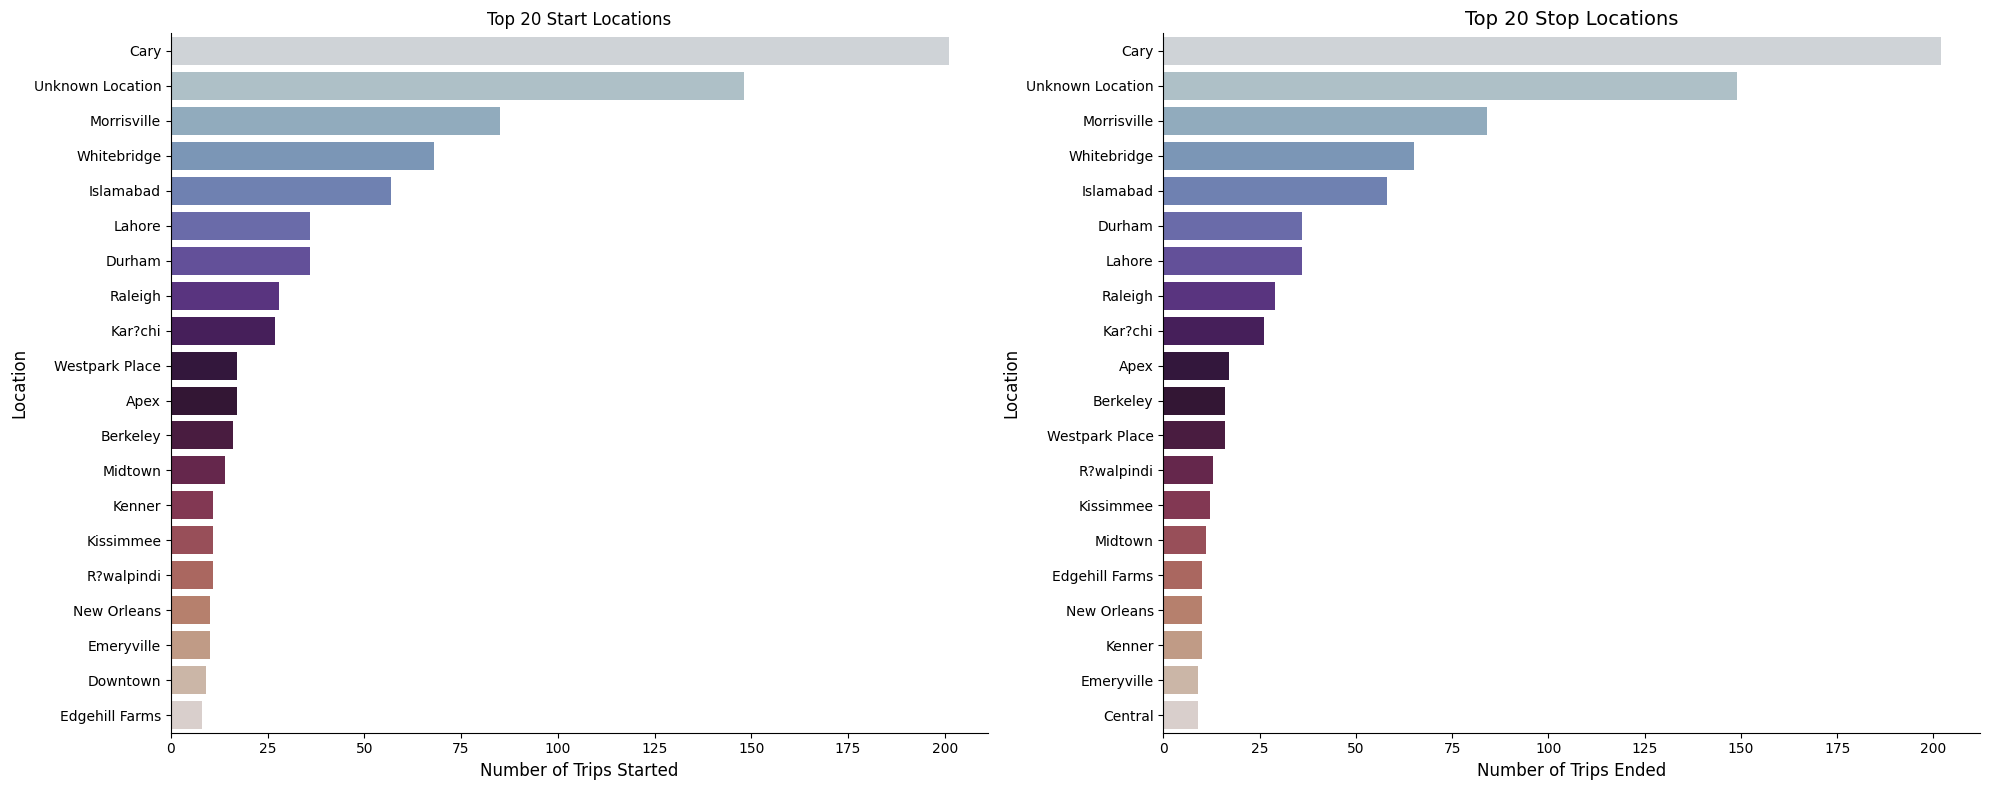

In [14]:
# First, we find the busiest start and stop locations
busiest_start_location = data['start'].value_counts().idxmax()
busiest_stop_location = data['stop'].value_counts().idxmax()

print(f"The busiest start location among the dataset is: {busiest_start_location}")
print(f"The busiest stop location among the dataset is: {busiest_stop_location}")

# let's visualize the number of trips starting from the busiest location and the number of trips ending at the busiest stop location

# Count the number of trips for each start location
start_location_counts = data['start'].value_counts().reset_index()
start_location_counts.columns = ['Location', 'Number of Starts']

# Count the number of trips for each stop location
stop_location_counts = data['stop'].value_counts().reset_index()
stop_location_counts.columns = ['Location', 'Number of Stops']

# Plotting
plt.figure(figsize=(20, 8))

# Plot for start locations
plt.subplot(1, 2, 1)
sns.barplot(x='Number of Starts', y='Location', data=start_location_counts.head(20), palette='twilight')
plt.title('Top 20 Start Locations')
plt.xlabel('Number of Trips Started',fontsize=12)
plt.ylabel('Location',fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Plot for stop locations
plt.subplot(1, 2, 2)
sns.barplot(x='Number of Stops', y='Location', data=stop_location_counts.head(20), palette='twilight')
plt.title('Top 20 Stop Locations',fontsize = 14)
plt.xlabel('Number of Trips Ended', fontsize = 12)
plt.ylabel('Location', fontsize = 12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

Plot: Barplot between Number of Trips and Time Slots

In [15]:
## Adding New column Day Name, Trip Hour and Month Name columns for each row
data['day_name'] = data['start_date'].dt.day_name()
data['trip_hour'] = data['start_date'].dt.hour
data['month_name'] = data['start_date'].dt.month_name()
data.head()

,start_date,end_date,category,start,stop,miles,purpose,day_name,trip_hour,month_name
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,21,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,Saturday,1,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,20,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,17,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,14,January


In [16]:
# Creating new column for Time Slot for EDA

time_slots = {
    0: 'Late Night',
    1: 'Late Night',
    2: 'Late Night',
    3: 'Midnight',
    4: 'Midnight',
    5: 'Early Morning',
    6: 'Early Morning',
    7: 'Early Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'After Noon',
    13: 'After Noon',
    14: 'After Noon',
    15: 'After Noon',
    16: 'Evening',
    17: 'Evening',
    18: 'Evening',
    19: 'Evening',
    20: 'Night',
    21: 'Night',
    22: 'Night',
    23: 'Late Night',
}

# Function to map trip hours to time slots
def map_trip_to_time_slot(trip_hour):
    # Ensure trip_hour is within the valid range
    if 0 <= trip_hour <= 23:
        # Lookup the corresponding time slot from the dictionary
        return time_slots.get(trip_hour)
    else:
        # Handle the case when trip_hour is outside the valid range
        return 'Invalid Hour'

# Apply the function to create a new column 'time_slot'
data['time_slot'] = data['trip_hour'].apply(map_trip_to_time_slot)

In [17]:
## Data After adding new Columns
data.head()

,start_date,end_date,category,start,stop,miles,purpose,day_name,trip_hour,month_name,time_slot
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,21,January,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,Saturday,1,January,Late Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,20,January,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,17,January,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,14,January,After Noon


Number Of Trips per Slot:
       time_slot  count
0     After Noon    358
1        Evening    345
2        Morning    223
3          Night    153
4     Late Night     51
5  Early Morning     21
6       Midnight      3


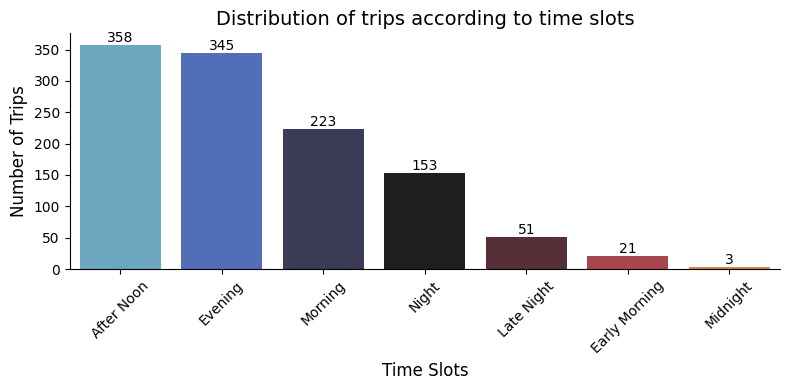

In [18]:
## Variable time_slot_count for number of values w.r.t time slots
time_slot_count = data['time_slot'].value_counts()

#Making DataFrame for time_slot_count details
time_slot_count_data = time_slot_count.reset_index()

#Renaming the columns
time_slot_count_data.columns = ['time_slot','count']
print(f"{Fore.YELLOW}Number Of Trips per Slot:\n{Style.RESET_ALL}{time_slot_count_data}")

#Setting the Figure Size for Plot
plt.figure(figsize=(8,4))

## ## Plot the Bar with seaborn's Barplot function
sns.barplot(x = time_slot_count.index, y = time_slot_count.values,palette='icefire')

# Add annotations to each bar
for i, count in enumerate(time_slot_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)


plt.title("Distribution of trips according to time slots",fontsize = 14)
plt.xticks(rotation=45)
plt.xlabel("Time Slots",fontsize=12)
plt.ylabel("Number of Trips",fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

Plot: Distribution of Trips on basis of Purpose

Number Of Trips per Purpose:
            purpose  count
0           Missing    502
1           Meeting    186
2    Meal/Entertain    160
3   Errand/Supplies    128
4    Customer Visit    101
5    Temporary Site     50
6   Between Offices     18
7            Moving      4
8    Airport/Travel      3
9       Charity ($)      1
10          Commute      1


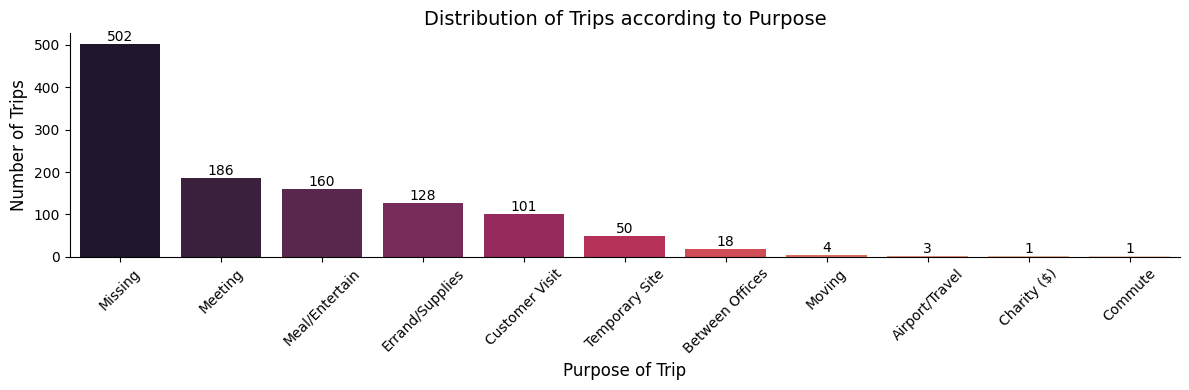

In [19]:
purpose_value_count = data['purpose'].value_counts()

#Making DataFrame for time_slot_count details
purpose_value_count_data = purpose_value_count.reset_index()
print(f"{Fore.YELLOW}Number Of Trips per Purpose:\n{Style.RESET_ALL}{purpose_value_count_data}")

#Renaming the columns
purpose_value_count_data.columns = ['purpose_of_trip','count']

# Plot Size
plt.figure(figsize=(12,4))

## Plot the Bar with seaborn's Barplot function
sns.barplot(y = purpose_value_count.values, x = purpose_value_count.index,palette='rocket')

# Add annotations to each bar
for i, count in enumerate(purpose_value_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)


## Plotting properties of plot
plt.title("Distribution of Trips according to Purpose", fontsize = 14)
plt.xlabel("Purpose of Trip", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation = 45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Show the Plot
plt.tight_layout()
plt.show()

Plot: Distribution of Number of Trips according to Category

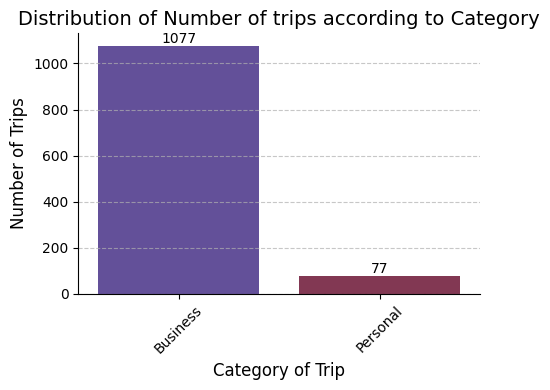

In [20]:
plt.figure(figsize=(5,4))

## Plot the Bar with seaborn's Barplot function
sns.countplot(x = data['category'], palette= "twilight")

# Annotate the bars with their respective counts
for i, count in enumerate(data['category'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom',fontsize = 10)

plt.title("Distribution of Number of trips according to Category", fontsize=14)
plt.xlabel("Category of Trip",fontsize=12)
plt.ylabel("Number of Trips",fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation = 45)

## Show the Plot
plt.tight_layout()
plt.show()


Plot: Distribution of Trips on Days

Number Of Trips per Day:
    day_name  count
0     Friday    206
1    Tuesday    175
2     Monday    174
3   Thursday    154
4   Saturday    150
5     Sunday    148
6  Wednesday    147


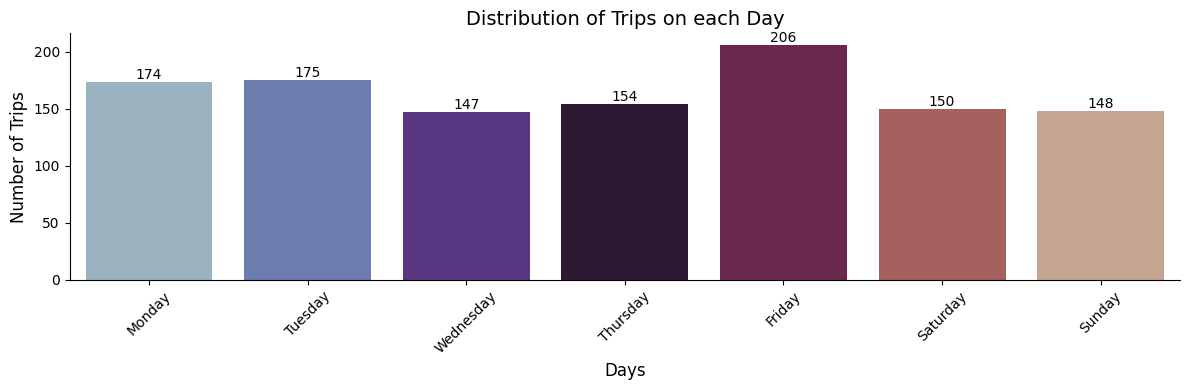

In [21]:
day_count = data['day_name'].value_counts()

# Converting to DataFrame
day_count_data = day_count.reset_index()
print(f"{Fore.YELLOW}Number Of Trips per Day:\n{Style.RESET_ALL}{day_count_data}")
## Plot Size
plt.figure(figsize=(12,4))

## Sort the day_count index
day_count = day_count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## ## Plot the Bar with seaborn's Barplot function
sns.barplot(x=day_count.index, y=day_count.values, palette='twilight')

# Add annotations to each bar
for i, count in enumerate(day_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

## Plotting properties of purpose count plot
plt.title("Distribution of Trips on each Day",fontsize=14)
plt.xlabel("Days",fontsize=12)
plt.ylabel("Number of Trips",fontsize=12)
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Show the Plot
plt.tight_layout()
plt.show()


Plot: Distribuiton of plot on Months

Number of Rides per Month:
   month_name  count
0    December    146
1      August    133
2    November    122
3    February    115
4       March    113
5        July    112
6        June    107
7     October    106
8     January     61
9       April     54
10        May     49
11  September     36
        month  count
0    December    146
1      August    133
2    November    122
3    February    115
4       March    113
5        July    112
6        June    107
7     October    106
8     January     61
9       April     54
10        May     49
11  September     36


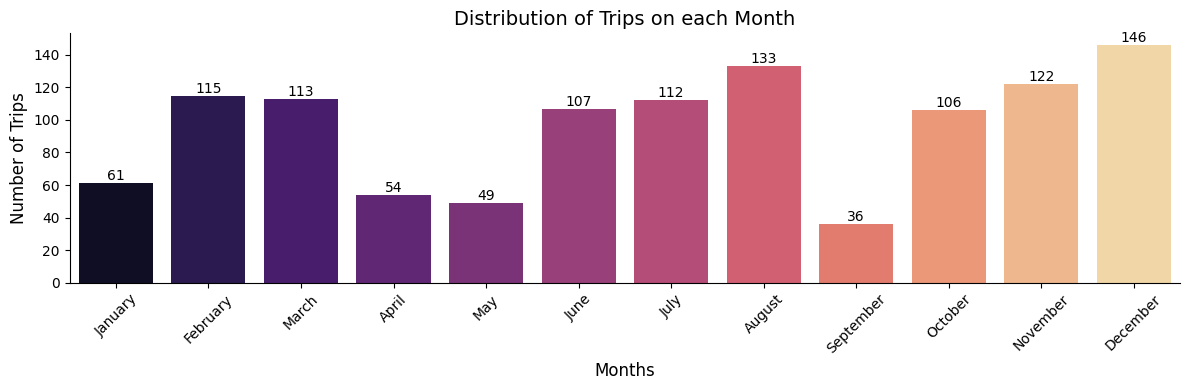

In [22]:
month_count = data['month_name'].value_counts()
#Making DataFrame for time_slot_count details
month_count_data = month_count.reset_index()
print(f"{Fore.YELLOW}Number of Rides per Month:\n{Style.RESET_ALL}{month_count_data}")

#Renaming the columns
month_count_data.columns = ['month','count']

print(month_count_data)


## Plot Size
plt.figure(figsize=(12,4))

## Sort the month_count index
month_count = month_count.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September',
                                   'October','November','December'])

## Plot the Bar with seaborn's Barplot function
sns.countplot(x= data['month_name'],palette='magma')

# Add annotations to each bar
for i, count in enumerate(month_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

## Plotting properties of purpose count plot
plt.title("Distribution of Trips on each Month",fontsize=14)
plt.xlabel("Months",fontsize=12)
plt.ylabel("Number of Trips",fontsize=12)
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Show the Plot
plt.tight_layout()
plt.show()


Plot: Distribution between Purpose and Miles travelled

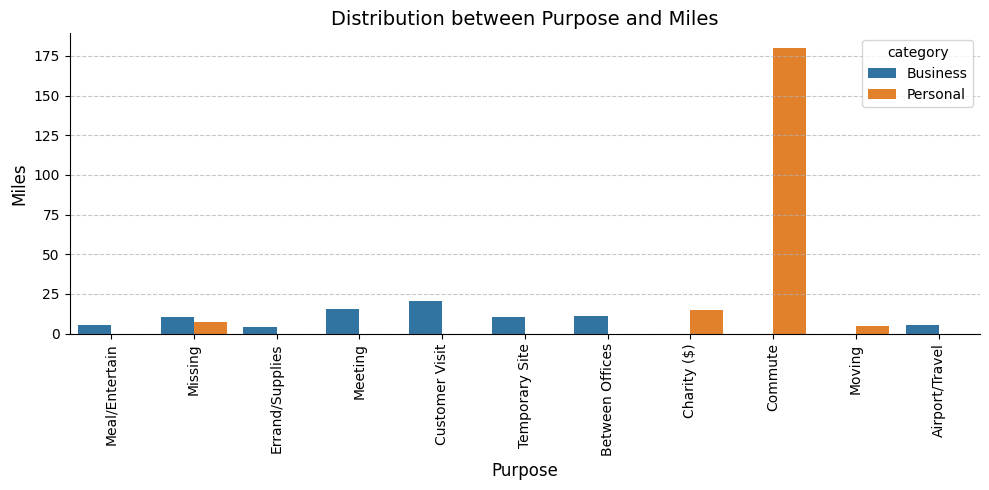

In [23]:
plt.figure(figsize=(10,5))

## Plot the Barplot with seaborn's Barplot function
sns.barplot(x = data['purpose'], y = data['miles'], hue = data['category'], data = data, ci = None)

## Plotting Properties
plt.title("Distribution between Purpose and Miles",fontsize=14)
plt.xlabel("Purpose", fontsize=12)
plt.ylabel("Miles",fontsize=12)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Show the Plot
plt.tight_layout()
plt.show()

Uber Trip Trends Over the Year using Lineplot

start_date
2016-01-01    1
2016-01-02    2
2016-01-03    0
2016-01-04    0
2016-01-05    1
Freq: D, dtype: int64


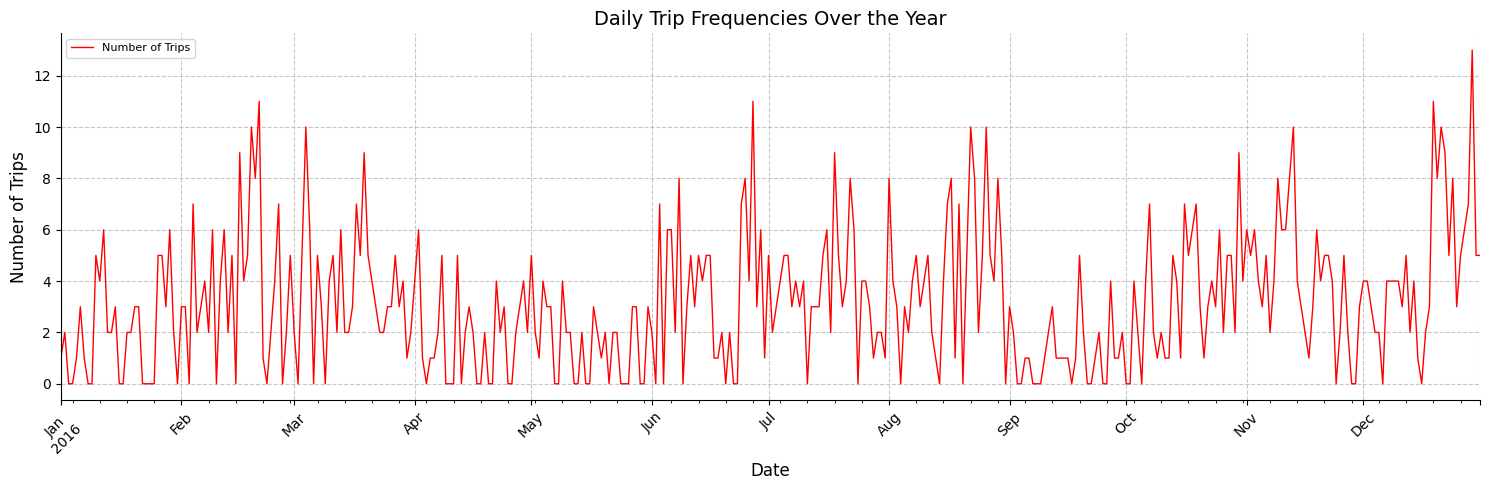

In [24]:
#Making variable of Trips 
daily_trips = data.resample('D', on='start_date').size()
print(daily_trips.head())
plt.figure(figsize=(15, 5))

# Plot the daily trip frequencies with a line plot
daily_trips.plot(title='Daily Trip Frequencies', color='red', linewidth=1)

# Add labels and title
plt.title('Daily Trip Frequencies Over the Year', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a legend
plt.legend(['Number of Trips'], loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()


Distribution Plot of Trip Miles


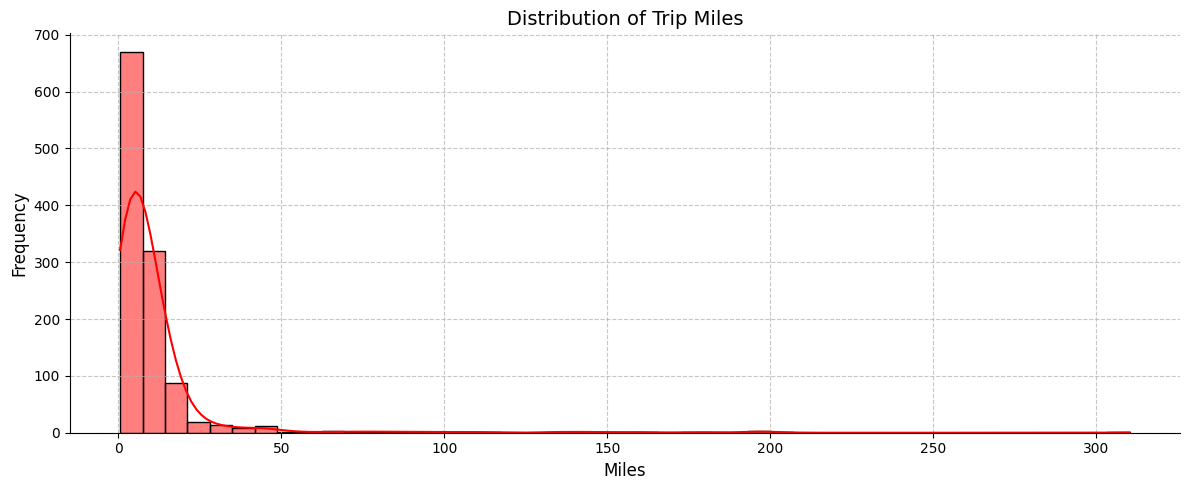

In [25]:
plt.figure(figsize=(12, 5))
sns.histplot(data['miles'], bins=45, kde=True, color='red')

## Plotting the Histogram Plot
plt.title('Distribution of Trip Miles',fontsize=14)
plt.xlabel('Miles',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.grid(True,linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

##Show the Plot
plt.tight_layout()
plt.show()

Distribution Plot of Trip Duration

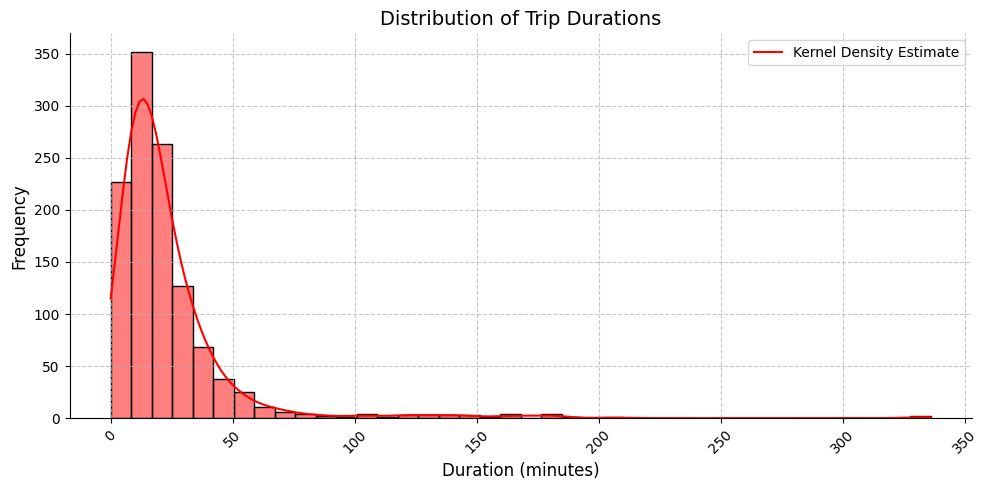

In [26]:
data['duration'] = (data['end_date'] - data['start_date']).dt.total_seconds() / 60

plt.figure(figsize=(10, 5))

# Plot the histogram with seaborn's histplot function
sns.histplot(data['duration'], bins=40, color='red', kde=True)

# Add title and labels with larger font sizes
plt.title('Distribution of Trip Durations', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation = 45)
plt.grid(True, linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a legend for the KDE plot
plt.legend(['Kernel Density Estimate'], loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


Average Distance Travelled on Basis of Category

Average Distance per Category:
   category      miles
0  Business  10.656546
1  Personal   9.320779


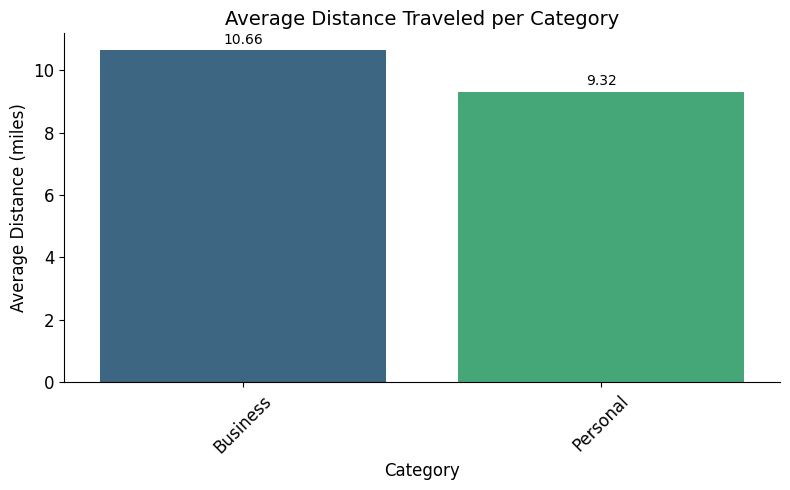

In [27]:
# Grouping by 'CATEGORY' and calculating the mean of 'MILES'
avg_distance_per_category = data.groupby('category')['miles'].mean()

# Print the DataFrame for reference
avg_distance_per_category_data = avg_distance_per_category.reset_index()
print(f"{Fore.YELLOW}Average Distance per Category:\n{Style.RESET_ALL}{avg_distance_per_category_data}")

# Plotting the average distance per category
plt.figure(figsize=(8, 5))

# Using Seaborn's barplot
sns.barplot(x='category', y='miles', data=avg_distance_per_category_data, palette='viridis')

# Add annotations to each bar
for index, row in avg_distance_per_category_data.iterrows():
    plt.text(index, row['miles'] + 0.1, f'{row["miles"]:.2f}', ha='center', va='bottom')

# Add title and labels
plt.title('Average Distance Traveled per Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Distance (miles)', fontsize=12)
plt.xticks(rotation=45)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()